In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TQ", "REFPROP::HYDROGEN", 29.8847223353771, 0.994473504557153, 33320.0304331457/3600, "R17")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 44.3705730801879, 7.79999*1e5, cold1_In.M, "R18")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 21.1017266469073, 1.250*1e5, 4629.89033353505/3600, "R09")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 25.1041374483944, 1.24608*1e5, cold2_In.M, "R10")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.000, 19.4383345900000*1e5, 10416.0000000000/3600, "F06")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F06 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 30.000, 19.4383345900000*1e5, mainH2_In.M, "F07")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.400, 29.4293400000000*1e5, 4629.89033353505/3600, "R05a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 33.200, 29.40645*1e5, hot_In.M, "R06")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R17
M [kg/s]    =  9.2556
P [bar]     =  7.895
T [Kelvin]  =  29.88
H [kJ/kg]   =  440.84
S [kJ/kg.K] =  15.132


Stream R18
M [kg/s]    =  9.2556
P [bar]     =  7.8
T [Kelvin]  =  44.37
H [kJ/kg]   =  666.346
S [kJ/kg.K] =  21.483


Stream R09
M [kg/s]    =  1.2861
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R10
M [kg/s]    =  1.2861
P [bar]     =  1.246
T [Kelvin]  =  25.1
H [kJ/kg]   =  499.643
S [kJ/kg.K] =  23.494


HOT STREAMS(from ASPEN HYSYS)
F06 p-H2 mole fraction: 0.819
Stream F06
M [kg/s]    =  2.8933
P [bar]     =  19.438
T [Kelvin]  =  46.0
H [kJ/kg]   =  731.774
S [kJ/kg.K] =  20.495


Stream F07
M [kg/s]    =  2.8933
P [bar]     =  19.438
T [Kelvin]  =  30.0
H [kJ/kg]   =  154.834
S [kJ/kg.K] =  5.002


Stream R05a
M [kg/s]    =  1.2861
P [bar]     =  29.429
T [Kelvin]  =  47.4
H [kJ/kg]   =  560.138
S [kJ/kg.K] =  14.653


Stream R06
M [kg/s]    =  1.2861
P [bar]     =  29.406
T [Kel

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(x*(cold1_In.H-cold1_Out.H) + cold2_In.M*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow1A = res.x

cold1A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow1A, "R17A")
cold1A_In.printState()
cold1B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold1_In.M-massFlow1A, "R17B")
cold1B_In.printState()

Stream R17A
M [kg/s]    =  1.8642
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R17B
M [kg/s]    =  7.3914
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433




In [4]:
nParallelHx = 2

lengthPFHX = 4.4622
widthPFHX = 1.5000
heightPFHX = 0.4667
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 2.7545
widthHXA      = 1.5000
heightHXA     = 0.1133
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  4.4622
Width  [m]  =  1.5
Height [m]  =  0.4667
Volume [m3] =  3.124


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  2.7545
Width  [m]  =  1.5
Height [m]  =  0.1133
Volume [m3] =  0.468


HXB Geometry
Length [m]  =  4.4622
Width  [m]  =  1.5
Height [m]  =  0.397
Volume [m3] =  2.656




Adjusted Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  4.4622
Width  [m]  =  1.5
Height [m]  =  0.4667
Volume [m3] =  3.124


HX2 Geometry
Length [m]  =  4.4622
Width  [m]  =  1.5
Height [m]  =  0.397
Volume [m3] =  2.656

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.62e-05       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 1.62e-05 
Maximum boundary residual: 0.00e+00


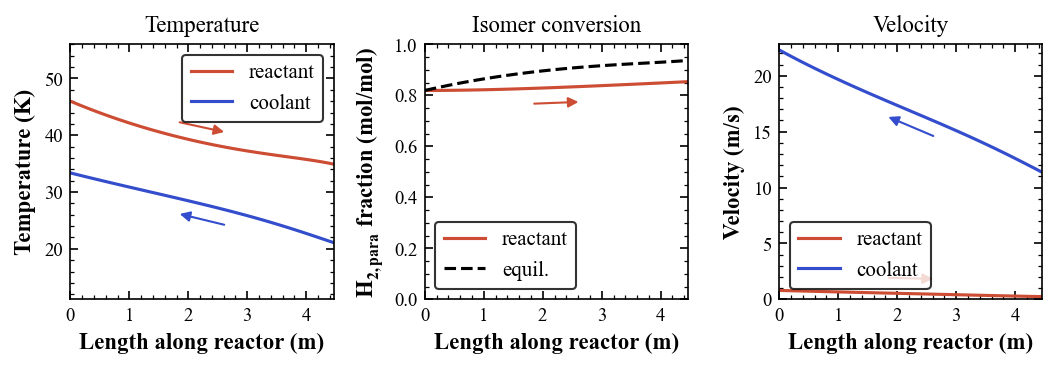

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold1B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold1B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold1B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Adjusted Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX2 Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

Final HX-6 Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  33.75


HX-B Geometry
Length [m]  =  7.5
Width  [m]  =  1.5
Height [m]  =  2.958
Volume [m3] =  33.282

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.83e-01       0.00e+00          50             92       
       2          5.87e-01       3.55e-15          142            244      
       3          3.18e-01       0.00e+00          386            597      
       4          1.27e-05       0.00e+00          983             0       
Solved in 4 iterations, number of nodes 983. 
Maximum relative residual: 1.27e-05 
Maximum boundary residual: 0.00e+00


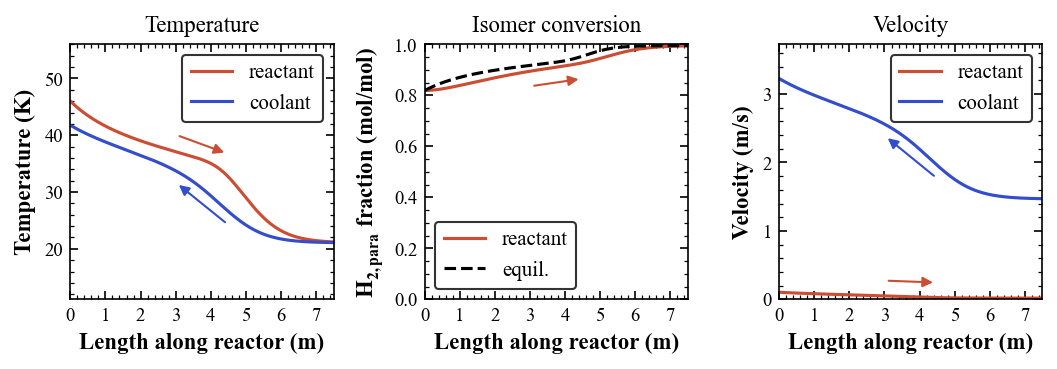

In [8]:
#Adjusted geometry
lengthPFHX = 7.500
widthPFHX  = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold1B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold1B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold1B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-6 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [9]:
xpara_final = 0.1/(math.exp(-175/mainH2_Out.T)+0.1) - 7.06*(10**-9)*(mainH2_Out.T**3) \
                + 3.42*(10**-6)*(mainH2_Out.T**2) - 6.2*(10**-5)*mainH2_Out.T - 0.00227

print(xpara_final)

0.970307481347243


In [10]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1943.833459              124.145597   
1    0.038265              1943.821466              124.152387   
2    0.076531              1943.809588              124.159148   
3    0.114796              1943.797825              124.165879   
4    0.153061              1943.786172              124.172583   
..        ...                      ...                     ...   
978  7.477324              1942.698763              124.998540   
979  7.482993              1942.698290              124.998905   
980  7.488662              1942.697817              124.999270   
981  7.494331              1942.697344              124.999635   
982  7.500000              1942.696872              125.000000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                   46.000000                41.760347   
1                   45.770469                41.621871   
2                   45.547586    